# This notebook will explore EDA and Viz or our data set

### imports

In [1]:
# imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')



Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# plot parameters
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'white' # or EAEAF2
plt.rcParams['font.size'] = 16

### read in the cleaned and merged csv from the data folder

In [3]:
movies = pd.read_csv('../../../data/joined_dfs_lc')
movies.head()

,movieId,userId,rating,title,genres,imdbId,tmdbId
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,5,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,1,7,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,1,15,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,1,17,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0


### make a dataframe with average rating for each title

In [4]:
rated = pd.DataFrame(movies.groupby('title')['rating'].mean())
rated.sort_values('rating', ascending=False)

,rating
title,
Vagabond (Sans toit ni loi) (1985),5.0
World of Glory (1991),5.0
Colourful (Karafuru) (2010),5.0
Come and See (Idi i smotri) (1985),5.0
When Worlds Collide (1951),5.0
...,...
Don't Look Now (1973),0.5
Journey 2: The Mysterious Island (2012),0.5
Joe Dirt 2: Beautiful Loser (2015),0.5


#### add the count of ratings for each title

In [5]:
rated['num_rating'] = pd.DataFrame(movies.groupby('title')['rating'].count())
rated.head()

,rating,num_rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


#### show the Top 10 rate titles

In [6]:
most_rated = rated.sort_values('num_rating', ascending=False)[:10]
most_rated

,rating,num_rating
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


### some visualizing

#### histogram showing distribution of ratings

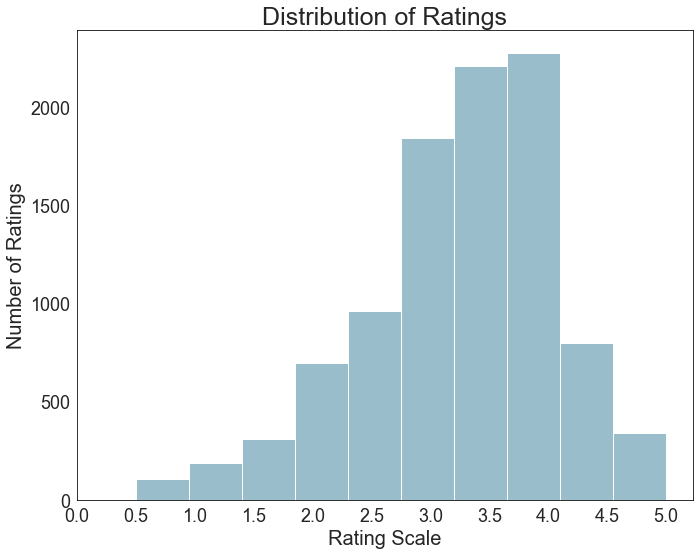

In [74]:
fig = plt.subplots(figsize=(10,8))
plt.hist(rated.rating, bins = 10, color='#99BDCB')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.title('Distribution of Ratings')
plt.xlabel('Rating Scale')
plt.ylabel('Number of Ratings')
plt.tight_layout()
plt.savefig('DistOfRatingsHist.png')
plt.show()

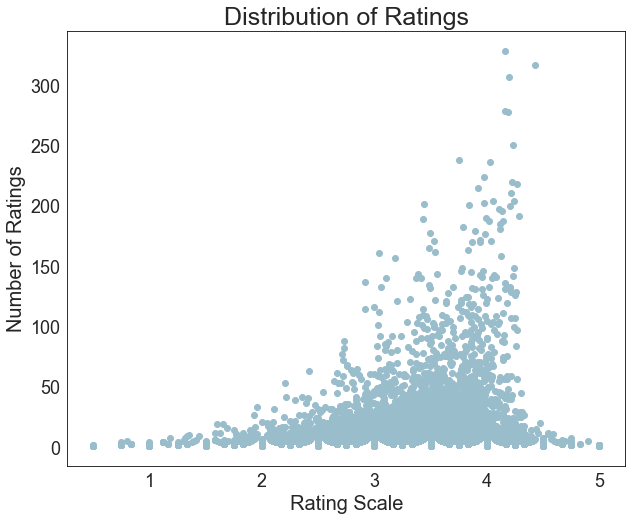

In [42]:
fig = plt.subplots(figsize=(10,8))
plt.scatter(rated.rating, rated.num_rating, color='#99BDCB')
plt.title('Distribution of Ratings')
plt.xlabel('Rating Scale')
plt.ylabel('Number of Ratings')
plt.savefig('DistOfRatingsScatter.png')
plt.show()

ValueError: Invalid RGBA argument: 1531892031.0

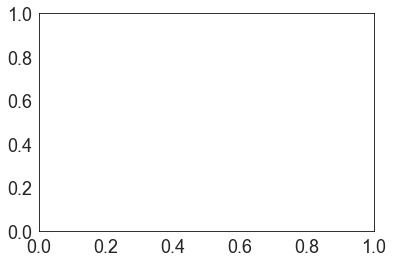

In [73]:
sns.distplot(rated.rating, color='1531892031')

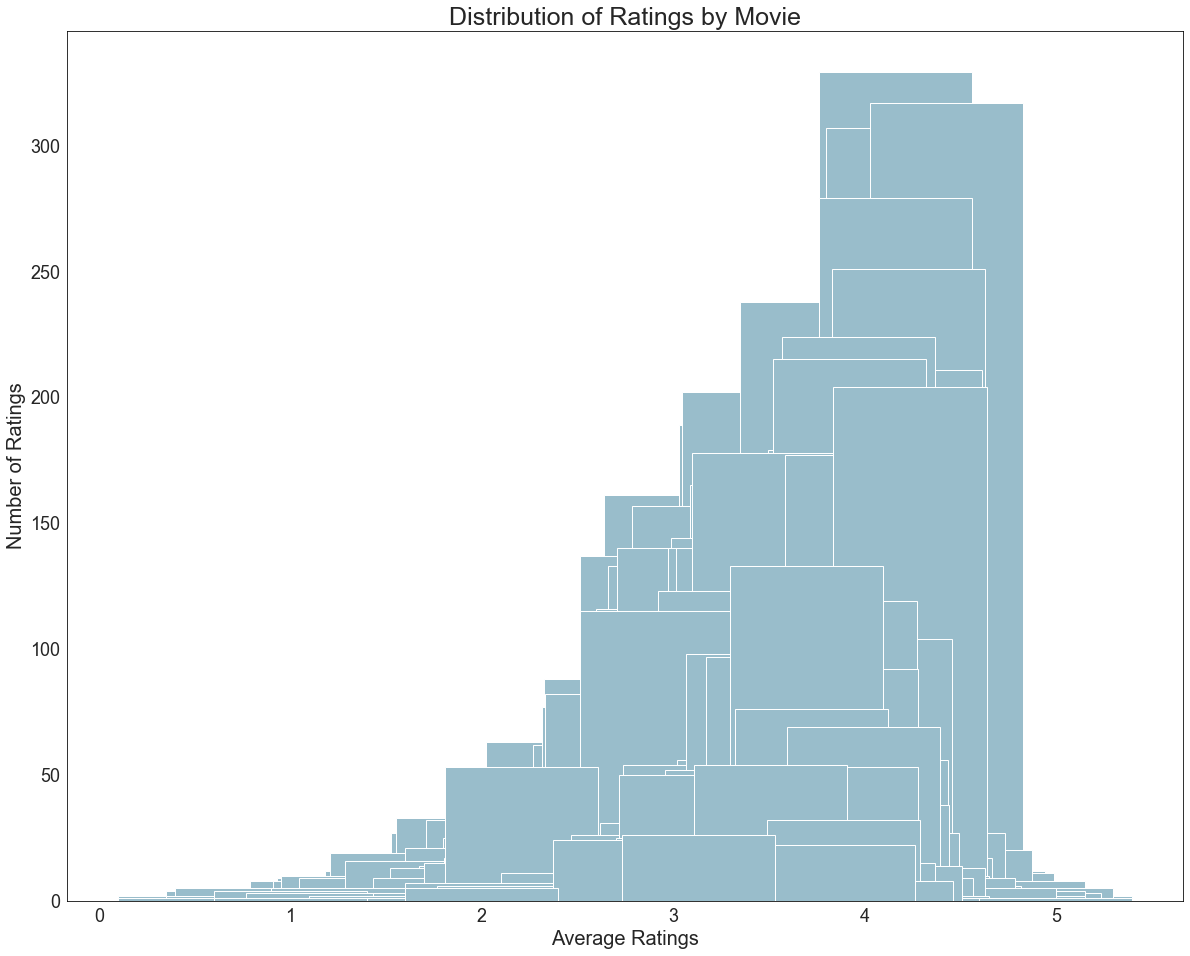

In [43]:
fig = plt.subplots(figsize=(20,16))
plt.bar(rated.rating, rated.num_rating, color='#99BDCB')
plt.title('Distribution of Ratings by Movie')
plt.xlabel('Average Ratings')
plt.ylabel('Number of Ratings')
plt.savefig('DistOfRatingsByMovie.png')
plt.show()

#### here are the Top 10 Rated movies

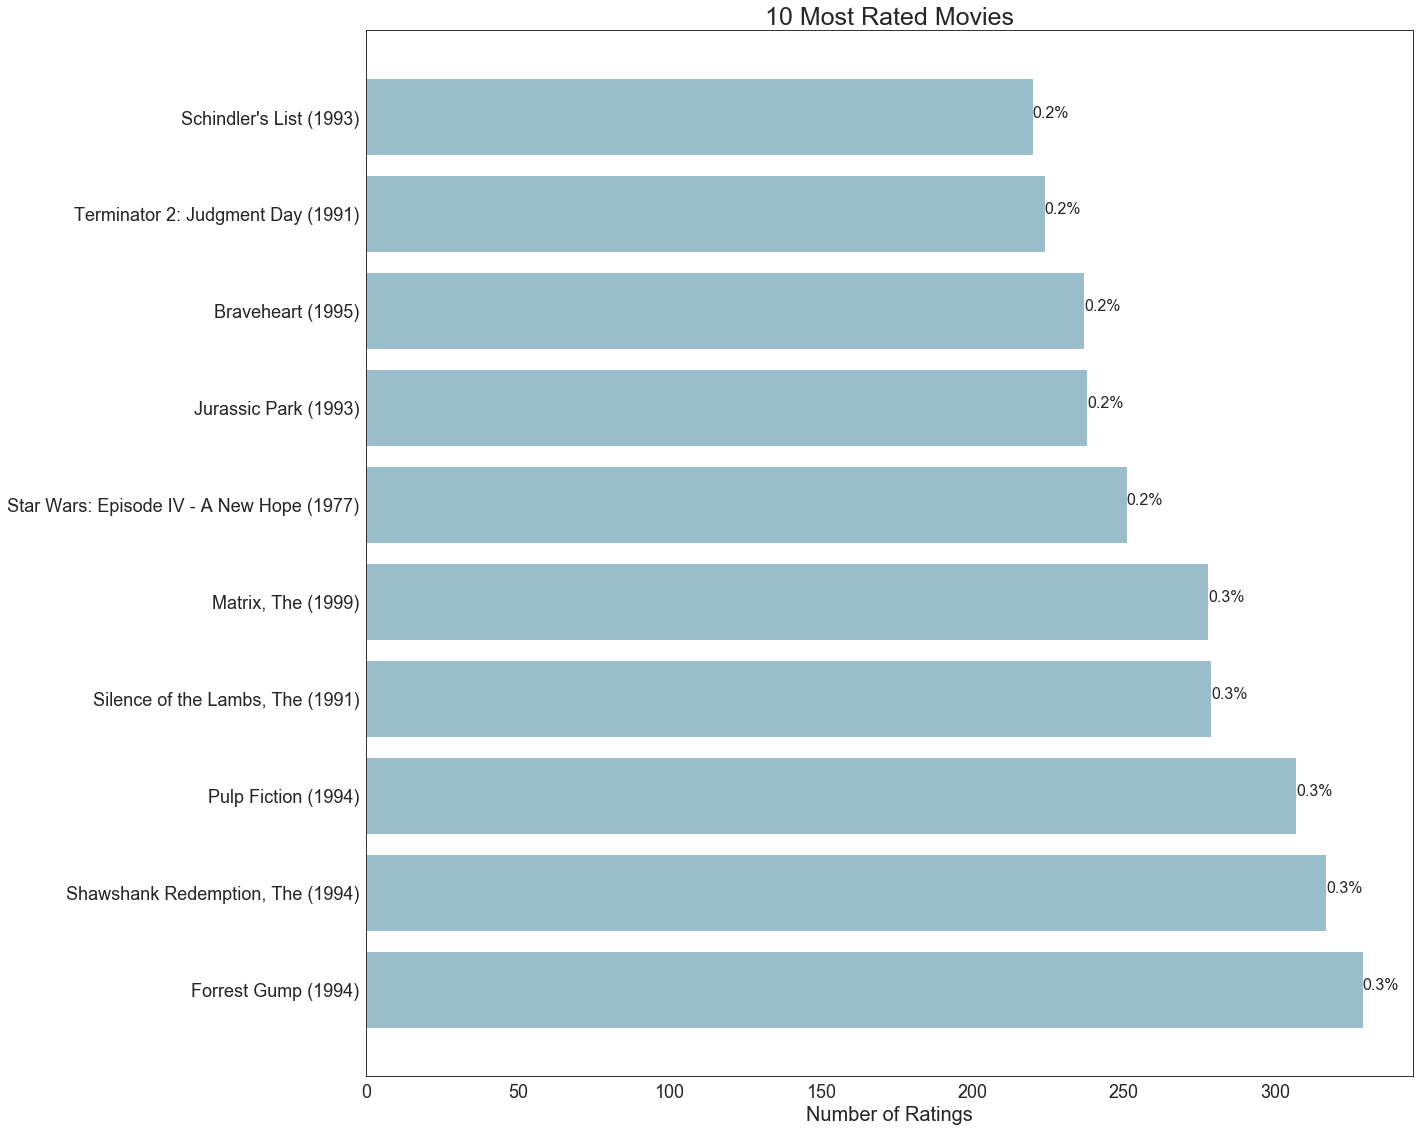

In [75]:
fig = plt.subplots(figsize=(20,16))
x = most_rated.index
y = most_rated.num_rating
plt.barh(x, y, color='#99BDCB')

for index, value in enumerate(y):
    plt.text(value, index, str(round(value/len(movies),3)*100)+ '%')


     

plt.title('10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.savefig('10MostRatedMoviesNum.png')
plt.show()

#### and the average rating for the Top 10 

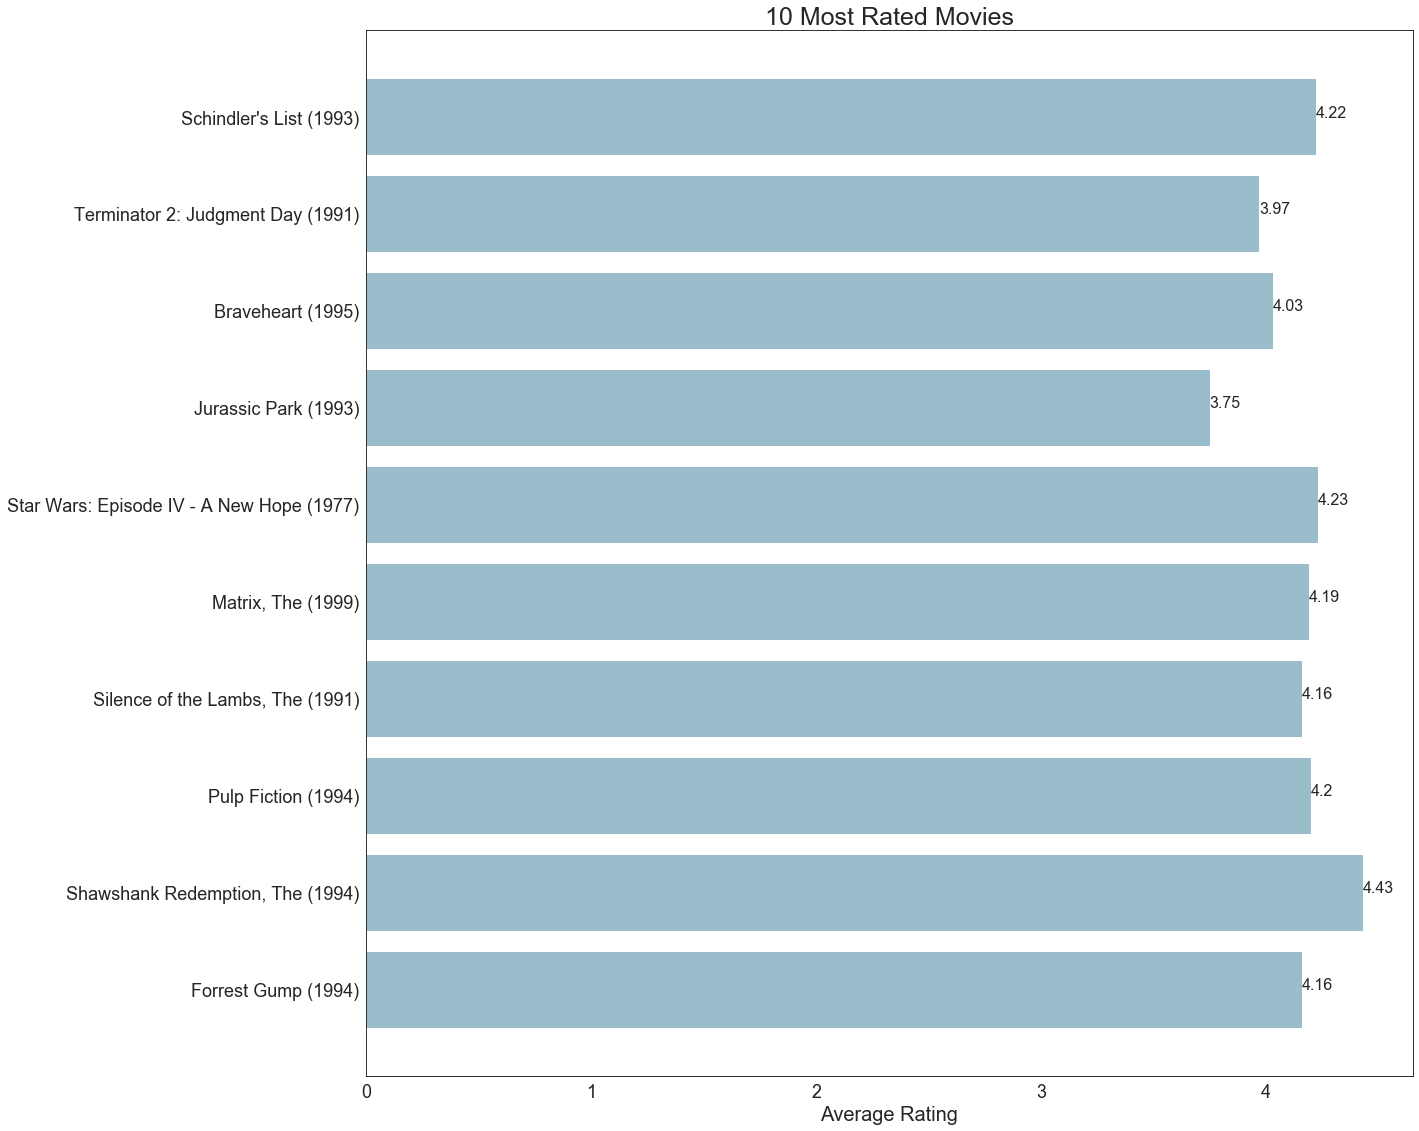

In [76]:
fig = plt.subplots(figsize=(20,16))
x = most_rated.index
y = round(most_rated.rating,2)
plt.barh(x, y, color='#99BDCB')

for index, value in enumerate(y):
    plt.text(value, index, str(value))

plt.title('10 Most Rated Movies')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.savefig('10MostRatedMoviesAvg.png')
plt.show()

### how manuy different genres are represented, and what are the most rated genres?

In [14]:
genre = pd.DataFrame(movies.groupby('genres')['title'].count())

genre.info

<bound method DataFrame.info of                                      title
genres                                    
(no genres listed)                      47
Action                                 186
Action|Adventure                       555
Action|Adventure|Animation              42
Action|Adventure|Animation|Children     39
...                                    ...
Sci-Fi|Thriller                        115
Sci-Fi|Thriller|IMAX                    12
Thriller                               628
War                                      9
Western                                151

[951 rows x 1 columns]>

In [15]:
most_rated_genre = genre.sort_values('title', ascending=False)[:10]
most_rated_genre

,title
genres,
Comedy,7196
Drama,6290
Comedy|Romance,3967
Comedy|Drama|Romance,3000
Comedy|Drama,2851
Drama|Romance,2838
Action|Adventure|Sci-Fi,2361
Crime|Drama,2315
Action|Crime|Thriller,1554


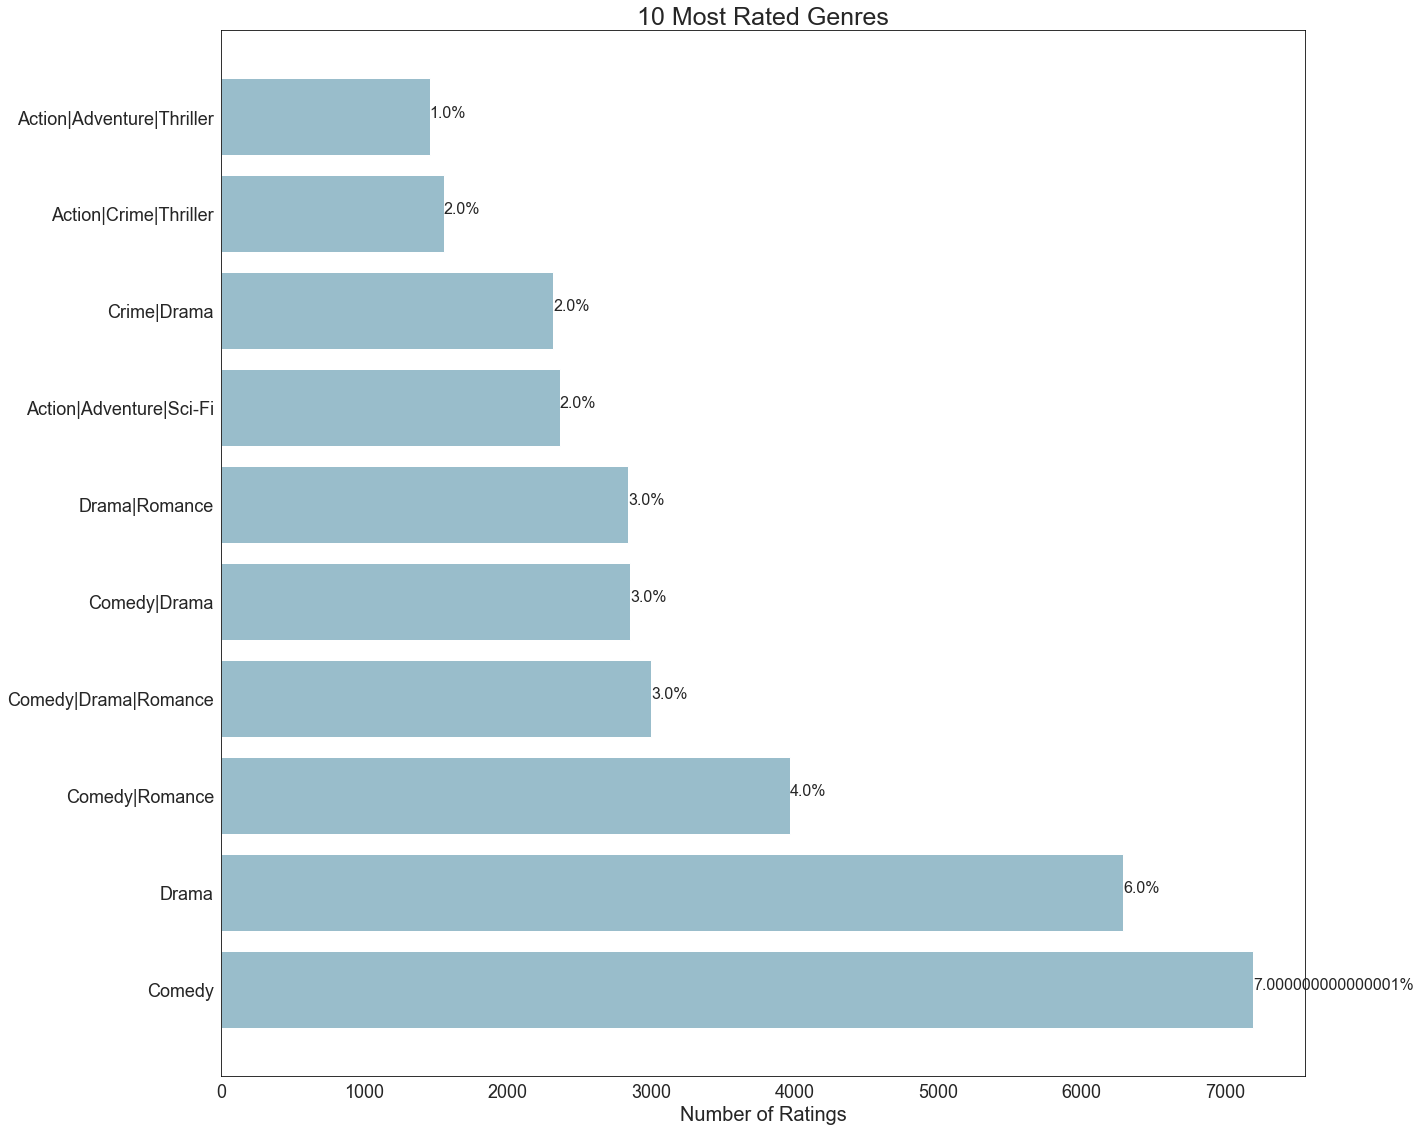

In [77]:
fig = plt.subplots(figsize=(20,16))
x = most_rated_genre.index
y = most_rated_genre.title
plt.barh(x, y, color='#99BDCB')

for index, value in enumerate(y):
    plt.text(value, index, str(round(value/len(movies),2)*100)+ '%')
plt.title('10 Most Rated Genres')
plt.xlabel('Number of Ratings')
plt.tight_layout()
plt.savefig('10MostRatedGenresNum.png')
plt.show()

In [20]:
users = pd.DataFrame(movies.groupby('userId')['rating'].count())
users.shape


(610, 1)

In [79]:
top100 = users.sort_values('rating', ascending=False)[:10]
top100

,rating
userId,
414,2698
599,2478
474,2108
448,1864
274,1346
610,1302
68,1260
380,1218
606,1115


In [80]:
bottom510 = users.sort_values('rating', ascending=False)[-305:]
bottom510

,rating
userId,
384,70
86,70
75,69
131,69
476,69
...,...
442,20
569,20
320,20


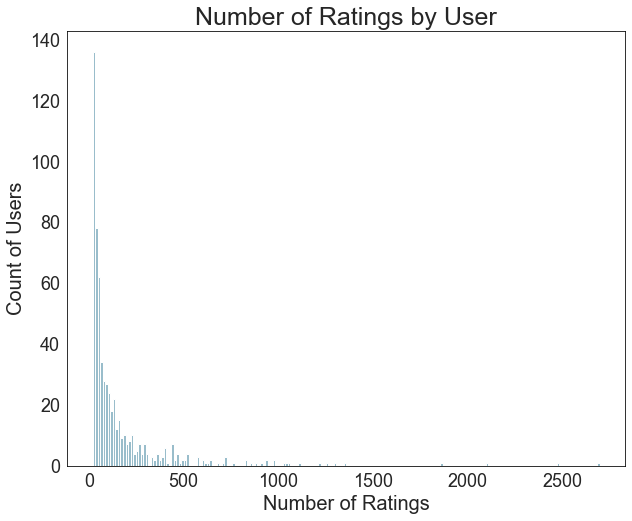

In [48]:
fig = plt.subplots(figsize=(10,8))
plt.hist(users.rating, bins = 200, color='#99BDCB')
plt.title('Number of Ratings by User')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')

plt.savefig('NumRatingsbyUser.png')
plt.show()

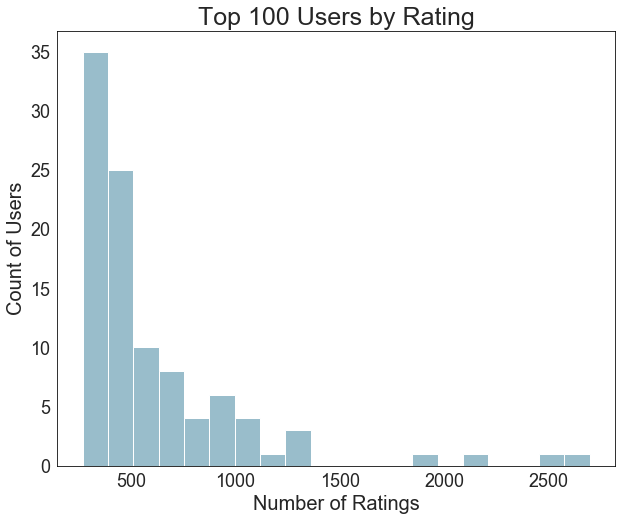

In [49]:
fig = plt.subplots(figsize=(10,8))
plt.hist(top100.rating, bins =20, color='#99BDCB')
plt.title('Top 100 Users by Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.savefig('Top100User.png')
plt.show()


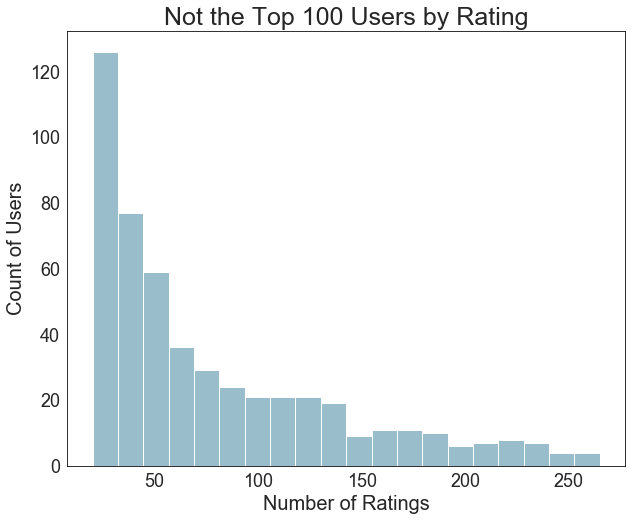

In [50]:
fig = plt.subplots(figsize=(10,8))
plt.hist(bottom510.rating, bins =20, color='#99BDCB')
plt.title('Not the Top 100 Users by Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.savefig('Bottom510User.png')
plt.show()
